In [1]:
# In this notebook, I will experiment with a variety of probability distributions
# responsible for the layout of a typical painting.
# The default characteristic is that any size shape is equally probable of being generated.
# However, an ideal distribution is that smaller shapes have a greater
# likelihood of being generated, while larger shapes are rare

# I will experiment with the default probability distribution along with:
# - Binomial Distribution
# - Gaussian Distribution
# - Poisson Distribution?
# - Exponential Distribution
# - Chi-Squared Distribution?
# - Log Normal Distribution?

In [3]:
import numpy as np

In [39]:
# SHAPE CLASS
# modified to generate shapes based on probability distribution function

import math
import random

class Shape:
    '''
    METHODS:
        - ability to draw the shape (circle) given a predefined tool
        - ability to define a maximum dimension of the shape's size
        - ability to define colors for shapes based on the shape's center pixel's position
        - ability to define the boundary coordinates for the shape based 
          on the shape's center and radius
        - ability to readout the shape's specs

    ATTRIBUTES:
        - the 2D pixel RGB map of a reference image (target)
        - the width and height of a reference image
        - a randomly defined radius, with a maximum size being the 
          hypotenuse of the reference image's dimensions
        - a randomly defined coordinate representing the shape's center
        - a tuple of RGBA values for the shape
    '''
    def __init__(self, colormap, width, height, pdf = "UNIFORM"):
        self.colormap = colormap
        self.width = width
        self.height = height
        self.pdf = pdf
        
        if self.pdf == "UNIFORM":
            self.radius = int(0.5 * random.randint(0, self.get_hypotenuse()))
        elif self.pdf == "GAUSSIAN":
            '''
            with a mean and std deviation approximated to be the ideal
            size based on the magnitude of the maximum dimension
            '''
            dim = self.get_hypotenuse()
            self.radius = abs(int(random.gauss(0.5 * width, 100)))
        elif self.pdf == "EXPONENTIAL":
            '''
            '''
            lambd = 2 / self.get_hypotenuse()
            self.radius = int(0.5 * random.expovariate(lambd))
        elif self.pdf == "GAMMA":
            '''
            '''
            self.radius = int(0.5 * random.gammavariate(0.5,0.1 * self.get_hypotenuse()))
        else:
            self.radius = int(0.5 * random.randint(0, self.get_hypotenuse()))
        self.center = (random.randint(0, self.width - 1), random.randint(0, self.height - 1))
        self.color = self.define_color()

    def __str__(self):
        '''
        - reads out key specs fo the shape -> (color, center coordinate, radius)
        '''
        return "Color: {0}; Radius: {1}; Center: {2}".format(self.color, self.radius, self.center)

    def define_color(self):
        '''
        - accessing the color map's dimensions to extract each RGB value
        - color is based on the shape's center coordinate
        - transparency values are determined as such:
            - if the shape is larger, then the shape is more transparent
            - larger, more transparent shapes will occupy the background,
              while smaller, more opaque shapes will occupy the foreground
        '''
        R = self.colormap[self.center[1]][self.center[0]][0]
        G = self.colormap[self.center[1]][self.center[0]][1]
        B = self.colormap[self.center[1]][self.center[0]][2]
        A = 255 - int((255 * (self.radius / self.get_hypotenuse())))
        return tuple([R, G, B, A])

    def define_drawing_coordinates(self):
        '''
        - the drawing tool requires the shape's boundary coordinates in order to draw
        - the shape's center coordinate and radius are used to compute the boundary points
        '''
        x0 = self.center[0] - self.radius # 180 deg position
        x1 = self.center[0] + self.radius #   0 deg position
        y0 = self.center[1] - self.radius # 270 deg position
        y1 = self.center[1] + self.radius #  90 deg position
        return tuple([x0, y0, x1, y1])

    def draw_circle(self, drawing_tool):
        '''
        - using the PIL library, this function draws an ellipse with symmetrical 
          coordinates, thus drawing a circle
        - the drawing tool is defined in the Painting object
        '''
        drawing_tool.ellipse(self.define_drawing_coordinates(), self.color)

    def get_hypotenuse(self):
        '''
        - half of the hypotenuse of the width and height dimensions will be the 
          maximum possible radius defined for a shape
        '''
        return int(math.sqrt((self.width) ** 2 + (self.height) ** 2))



In [40]:
COLORMAP = np.zeros([300, 400, 3])
WIDTH = 400
HEIGHT = 300

In [41]:
# a singular shape

shape = Shape(colormap = COLORMAP, width = WIDTH, height = HEIGHT)
print('{}'.format(shape))
print('Radius: {}'.format(shape.radius))

Color: (0.0, 0.0, 0.0, 159); Radius: 190; Center: (115, 31)
Radius: 190


In [42]:
# a group of shapes

shapes_uniform = [Shape(colormap = COLORMAP, width = WIDTH, height = HEIGHT) for _ in range(0, 100000)]
for shape in shapes_uniform[:30]: print("{}".format(shape))

Color: (0.0, 0.0, 0.0, 204); Radius: 100; Center: (358, 82)
Color: (0.0, 0.0, 0.0, 183); Radius: 142; Center: (398, 47)
Color: (0.0, 0.0, 0.0, 207); Radius: 95; Center: (223, 262)
Color: (0.0, 0.0, 0.0, 237); Radius: 36; Center: (339, 243)
Color: (0.0, 0.0, 0.0, 142); Radius: 223; Center: (264, 51)
Color: (0.0, 0.0, 0.0, 223); Radius: 63; Center: (177, 0)
Color: (0.0, 0.0, 0.0, 251); Radius: 8; Center: (198, 180)
Color: (0.0, 0.0, 0.0, 147); Radius: 213; Center: (361, 69)
Color: (0.0, 0.0, 0.0, 145); Radius: 216; Center: (136, 126)
Color: (0.0, 0.0, 0.0, 210); Radius: 89; Center: (73, 182)
Color: (0.0, 0.0, 0.0, 142); Radius: 222; Center: (246, 32)
Color: (0.0, 0.0, 0.0, 190); Radius: 129; Center: (396, 7)
Color: (0.0, 0.0, 0.0, 228); Radius: 53; Center: (257, 202)
Color: (0.0, 0.0, 0.0, 176); Radius: 155; Center: (44, 260)
Color: (0.0, 0.0, 0.0, 212); Radius: 85; Center: (202, 206)
Color: (0.0, 0.0, 0.0, 152); Radius: 203; Center: (158, 196)
Color: (0.0, 0.0, 0.0, 200); Radius: 108; C

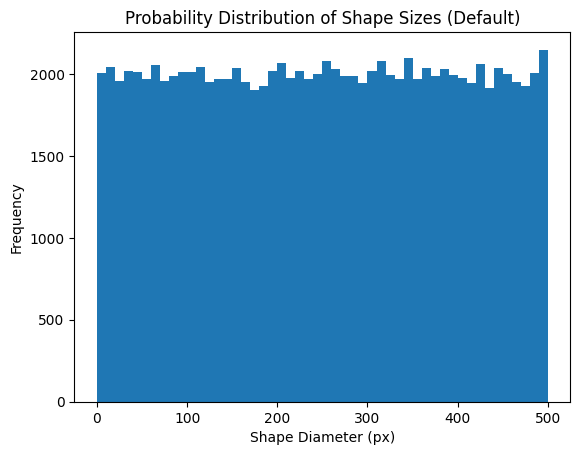

In [43]:
# default probability distribution of shape sizes

import matplotlib.pyplot as plt

data = [2 * shape.radius for shape in shapes_uniform]

plt.title("Probability Distribution of Shape Sizes (Default)")
plt.xlabel("Shape Diameter (px)")
plt.ylabel("Frequency")
plt.hist(data, bins = 50)
plt.show()

In [44]:
# Gaussian Distribution of shape sizes

shapes_gauss = [Shape(colormap = COLORMAP, width = WIDTH, height = HEIGHT, pdf = "GAUSSIAN") for _ in range(0, 100000)]
for shape in shapes_gauss[:30]: print("{}".format(shape))

Color: (0.0, 0.0, 0.0, 134); Radius: 239; Center: (226, 64)
Color: (0.0, 0.0, 0.0, 141); Radius: 225; Center: (121, 163)
Color: (0.0, 0.0, 0.0, 83); Radius: 339; Center: (139, 238)
Color: (0.0, 0.0, 0.0, -7); Radius: 515; Center: (243, 17)
Color: (0.0, 0.0, 0.0, 138); Radius: 231; Center: (304, 211)
Color: (0.0, 0.0, 0.0, 122); Radius: 261; Center: (348, 291)
Color: (0.0, 0.0, 0.0, 167); Radius: 173; Center: (75, 248)
Color: (0.0, 0.0, 0.0, 183); Radius: 142; Center: (221, 274)
Color: (0.0, 0.0, 0.0, 138); Radius: 230; Center: (397, 241)
Color: (0.0, 0.0, 0.0, 171); Radius: 165; Center: (337, 261)
Color: (0.0, 0.0, 0.0, 132); Radius: 243; Center: (299, 288)
Color: (0.0, 0.0, 0.0, 189); Radius: 131; Center: (307, 0)
Color: (0.0, 0.0, 0.0, 127); Radius: 252; Center: (177, 198)
Color: (0.0, 0.0, 0.0, 148); Radius: 211; Center: (27, 195)
Color: (0.0, 0.0, 0.0, 99); Radius: 307; Center: (173, 104)
Color: (0.0, 0.0, 0.0, 172); Radius: 164; Center: (241, 178)
Color: (0.0, 0.0, 0.0, 172); Radi

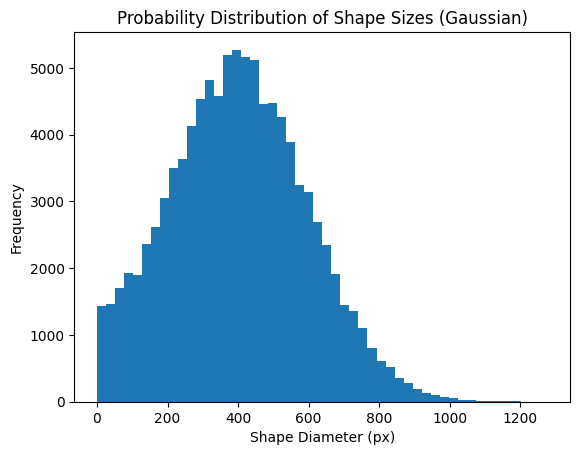

In [45]:
data = [2 * shape.radius for shape in shapes_gauss]

plt.title("Probability Distribution of Shape Sizes (Gaussian)")
plt.xlabel("Shape Diameter (px)")
plt.ylabel("Frequency")
plt.hist(data, bins = 50)
plt.show()

In [46]:
# Exponential Distribution of shape sizes

shapes_exp = [Shape(colormap = COLORMAP, width = WIDTH, height = HEIGHT, pdf = "EXPONENTIAL") for _ in range(0, 100000)]
for shape in shapes_exp[:30]: print("{}".format(shape))

Color: (0.0, 0.0, 0.0, 243); Radius: 24; Center: (64, 250)
Color: (0.0, 0.0, 0.0, 249); Radius: 13; Center: (115, 258)
Color: (0.0, 0.0, 0.0, 251); Radius: 9; Center: (65, 268)
Color: (0.0, 0.0, 0.0, 102); Radius: 300; Center: (293, 254)
Color: (0.0, 0.0, 0.0, 240); Radius: 31; Center: (279, 86)
Color: (0.0, 0.0, 0.0, 201); Radius: 106; Center: (3, 100)
Color: (0.0, 0.0, 0.0, 212); Radius: 86; Center: (10, 248)
Color: (0.0, 0.0, 0.0, 198); Radius: 112; Center: (165, 237)
Color: (0.0, 0.0, 0.0, 164); Radius: 179; Center: (8, 12)
Color: (0.0, 0.0, 0.0, 114); Radius: 277; Center: (53, 80)
Color: (0.0, 0.0, 0.0, 57); Radius: 389; Center: (212, 266)
Color: (0.0, 0.0, 0.0, 194); Radius: 120; Center: (358, 66)
Color: (0.0, 0.0, 0.0, 123); Radius: 259; Center: (179, 89)
Color: (0.0, 0.0, 0.0, 250); Radius: 10; Center: (329, 129)
Color: (0.0, 0.0, 0.0, 177); Radius: 153; Center: (306, 211)
Color: (0.0, 0.0, 0.0, 157); Radius: 194; Center: (325, 0)
Color: (0.0, 0.0, 0.0, 245); Radius: 20; Center

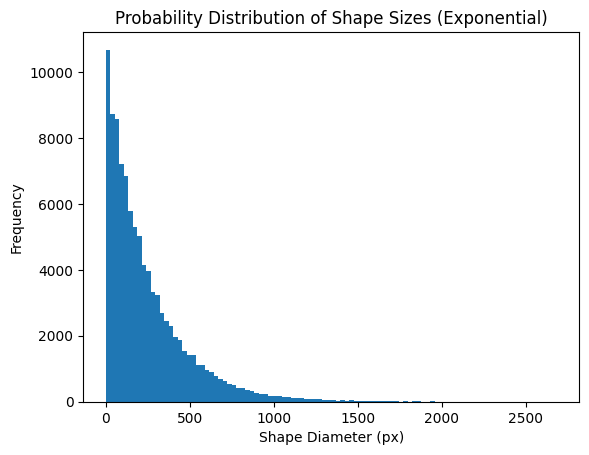

In [47]:
data = [2 * shape.radius for shape in shapes_exp]

plt.title("Probability Distribution of Shape Sizes (Exponential)")
plt.xlabel("Shape Diameter (px)")
plt.ylabel("Frequency")
plt.hist(data, bins = 100)
plt.show()

In [48]:
# Gamma Distribution of shape sizes

shapes_gamma = [Shape(colormap = COLORMAP, width = WIDTH, height = HEIGHT, pdf = "GAMMA") for _ in range(0, 100000)]
for shape in shapes_gamma[:30]: print("{}".format(shape))

Color: (0.0, 0.0, 0.0, 254); Radius: 3; Center: (245, 72)
Color: (0.0, 0.0, 0.0, 231); Radius: 49; Center: (340, 154)
Color: (0.0, 0.0, 0.0, 243); Radius: 24; Center: (62, 132)
Color: (0.0, 0.0, 0.0, 249); Radius: 13; Center: (82, 49)
Color: (0.0, 0.0, 0.0, 237); Radius: 36; Center: (179, 10)
Color: (0.0, 0.0, 0.0, 240); Radius: 30; Center: (387, 143)
Color: (0.0, 0.0, 0.0, 245); Radius: 20; Center: (13, 181)
Color: (0.0, 0.0, 0.0, 255); Radius: 0; Center: (387, 97)
Color: (0.0, 0.0, 0.0, 250); Radius: 11; Center: (41, 292)
Color: (0.0, 0.0, 0.0, 255); Radius: 0; Center: (156, 222)
Color: (0.0, 0.0, 0.0, 255); Radius: 0; Center: (254, 40)
Color: (0.0, 0.0, 0.0, 232); Radius: 47; Center: (70, 285)
Color: (0.0, 0.0, 0.0, 251); Radius: 8; Center: (37, 243)
Color: (0.0, 0.0, 0.0, 252); Radius: 6; Center: (46, 195)
Color: (0.0, 0.0, 0.0, 255); Radius: 0; Center: (118, 152)
Color: (0.0, 0.0, 0.0, 255); Radius: 1; Center: (387, 3)
Color: (0.0, 0.0, 0.0, 255); Radius: 1; Center: (397, 296)
Col

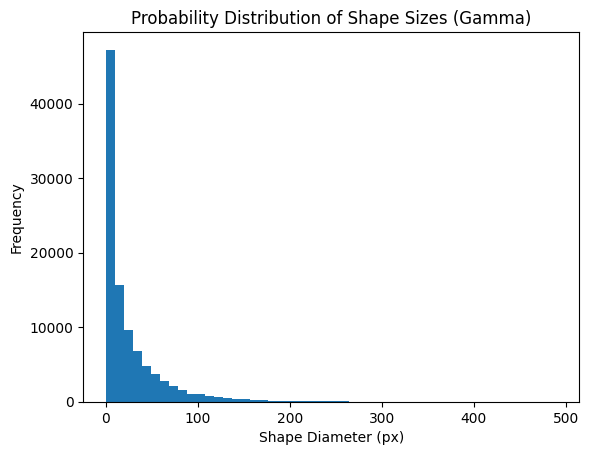

In [49]:
data = [2 * shape.radius for shape in shapes_gamma]

plt.title("Probability Distribution of Shape Sizes (Gamma)")
plt.xlabel("Shape Diameter (px)")
plt.ylabel("Frequency")
plt.hist(data, bins = 50)
plt.show()